# ><a name=imports> Import libraries</a>

In [1]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier ##foucs on 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# ! pip install -U pandas-profiling
#from pandas_profiling import ProfileReport
#ProfileReport(df)

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# <a name=EDA>Explratory data analysis(EDA)</a>

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.fillna(df.mean(), inplace = True)
#df["bmi"].fillna(df.mean(), inplace = True) 

In [9]:
df.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
gender - 0%
age - 0%
hypertension - 0%
heart_disease - 0%
ever_married - 0%
work_type - 0%
Residence_type - 0%
avg_glucose_level - 0%
bmi - 0%
smoking_status - 0%
stroke - 0%


In [11]:
sum(df.duplicated())

0

In [12]:
df.drop(columns=['id'],inplace=True)
df.drop(columns=['work_type'],inplace=True)

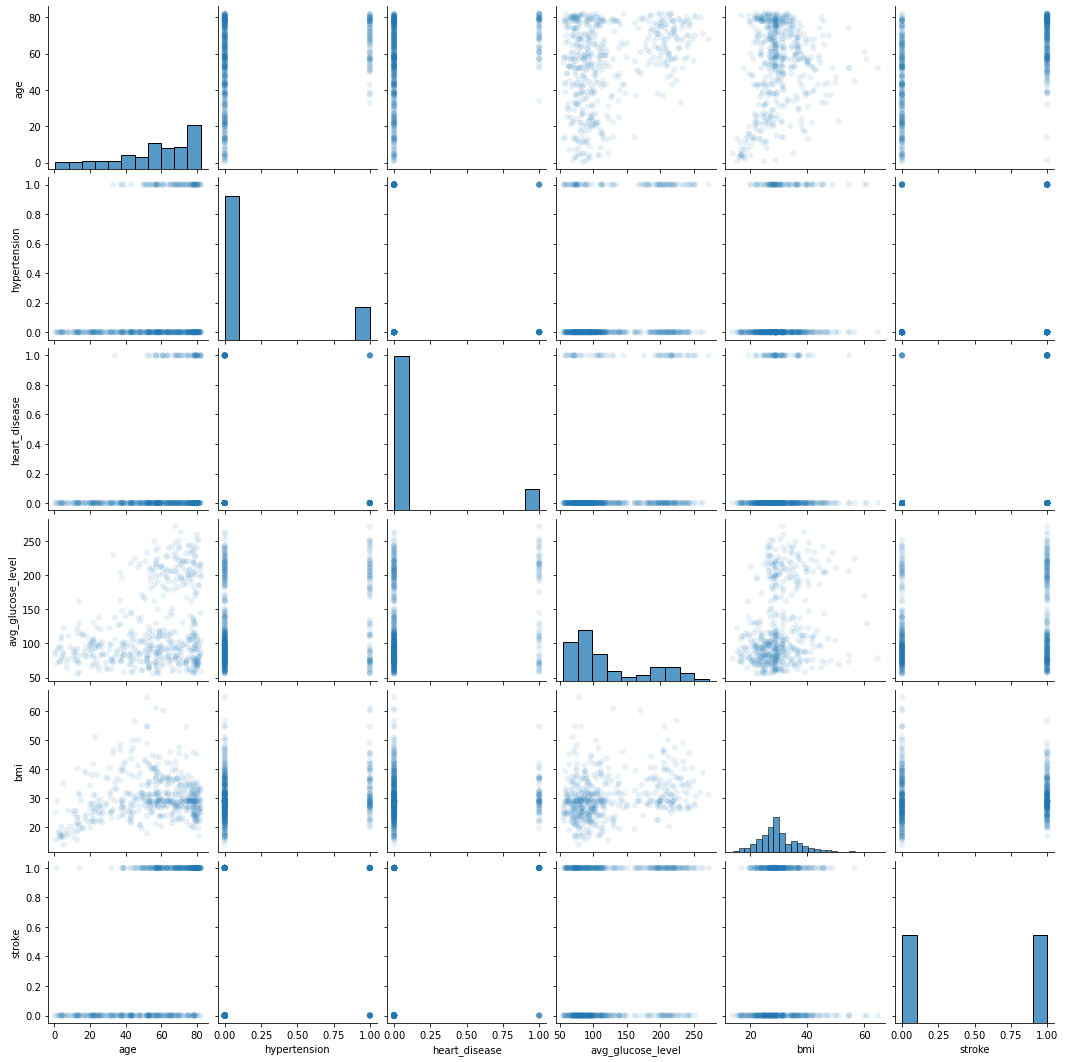

In [13]:
sns.pairplot(df[:500], plot_kws=dict(alpha=.1, edgecolor='none',cmap='OrRd'))


<AxesSubplot:>

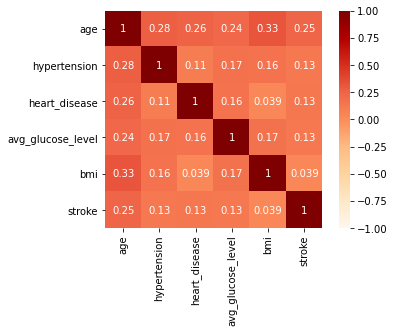

In [14]:
sns.heatmap(df.corr(),square=True, annot=True, vmin=-1, vmax=1,cmap='OrRd')


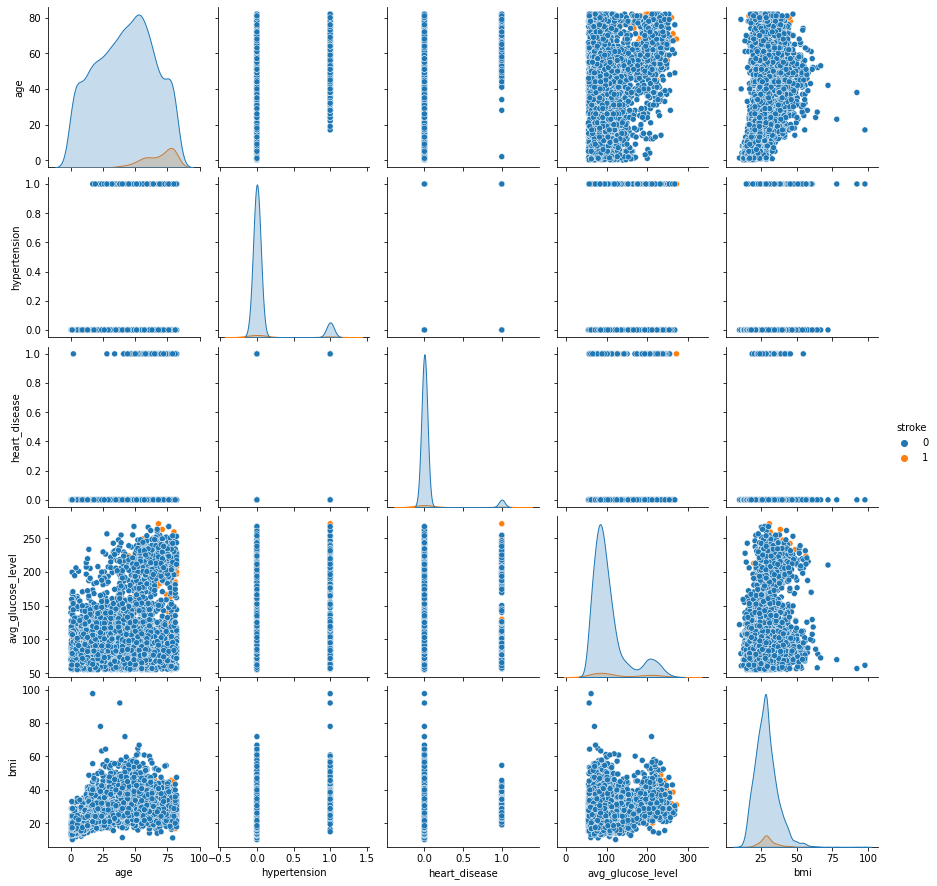

In [15]:
sns.pairplot(df, hue='stroke');

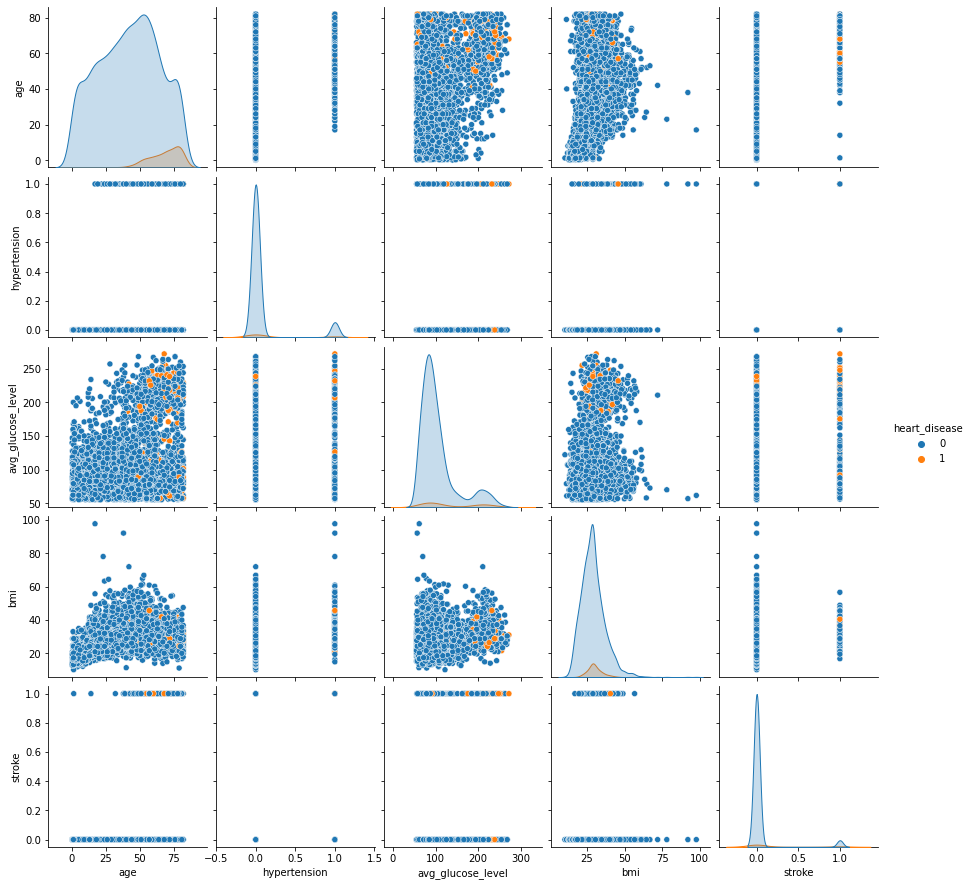

In [16]:
sns.pairplot(df, hue='heart_disease');

Text(0.5, 1.0, 'Outlires')

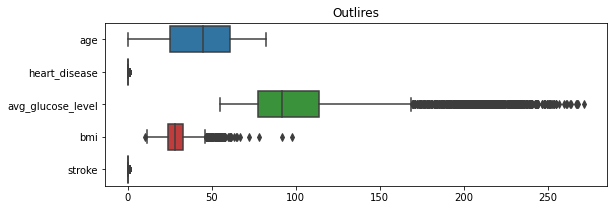

In [17]:
plt.figure(figsize=(9,3))
sns.boxplot(data=df[['age','heart_disease','avg_glucose_level','bmi','stroke']], orient='h')
plt.title("Outlires")

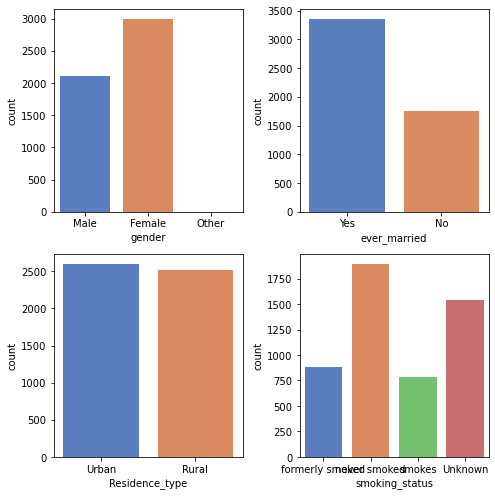

In [18]:
# Display all categoral columns as countplots(similar to histograms)
col_to_plot = df.select_dtypes(exclude= np.number).columns.to_list()

f, axes = plt.subplots(round(len(col_to_plot)/2),2, figsize=(7, 7))
for i,x in zip(col_to_plot,axes.flat):
    sns.countplot(data = df ,x = str(i) ,ax = x  ,palette="muted")
f.show()
plt.tight_layout()

## featuer engenering

to show which gender is most get stroke most? 

In [19]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [20]:
indexNames = df[ df['gender'] == 'Other' ].index
df.drop(indexNames , inplace=True)

<AxesSubplot:xlabel='gender'>

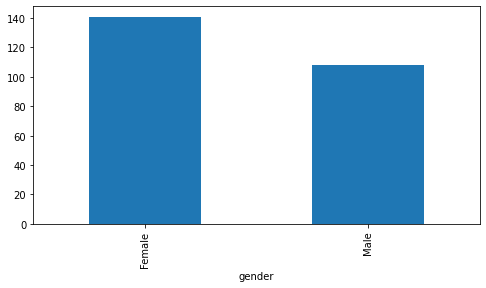

In [21]:
df.groupby('gender')['stroke'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(8,4))

to show in which age is most get stroke most? 

In [22]:
df.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
1.40       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

In [23]:
df.loc[(df.age >= 1) & (df.age < 19),  'AgeGroup'] = 'Kid'
df.loc[(df.age >= 20) & (df.age < 49),  'AgeGroup'] = 'Adult'
df.loc[(df.age >= 50) & (df.age < 100),  'AgeGroup'] = 'Old'

In [24]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,Male,67.0,0,1,Yes,Urban,228.69,36.600000,formerly smoked,1,Old
1,Female,61.0,0,0,Yes,Rural,202.21,28.893237,never smoked,1,Old
2,Male,80.0,0,1,Yes,Rural,105.92,32.500000,never smoked,1,Old
3,Female,49.0,0,0,Yes,Urban,171.23,34.400000,smokes,1,NaN
4,Female,79.0,1,0,Yes,Rural,174.12,24.000000,never smoked,1,Old
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Urban,83.75,28.893237,never smoked,0,Old
5106,Female,81.0,0,0,Yes,Urban,125.20,40.000000,never smoked,0,Old
5107,Female,35.0,0,0,Yes,Rural,82.99,30.600000,never smoked,0,Adult
5108,Male,51.0,0,0,Yes,Rural,166.29,25.600000,formerly smoked,0,Old


<AxesSubplot:xlabel='AgeGroup'>

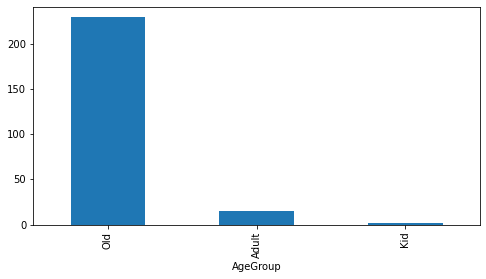

In [25]:
df.groupby('AgeGroup')['stroke'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(8,4))

<AxesSubplot:title={'center':'the most age group has stroke '}, ylabel='stroke'>

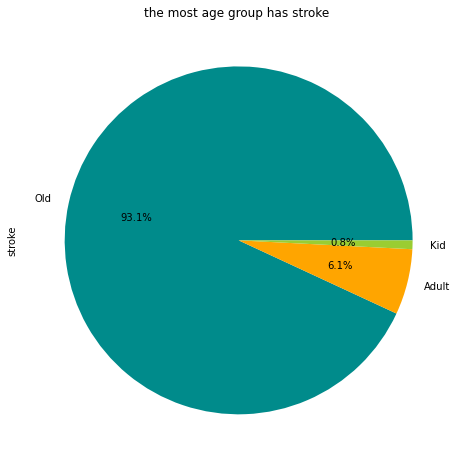

In [26]:
df.groupby('AgeGroup')['stroke'].sum().sort_values(ascending=False).plot.pie(title='the most age group has stroke ', 
                                                                           colors=['darkcyan','orange','yellowgreen'], 
                                                                             autopct='%1.1f%%'
                                                                            ,figsize=(8,8))

In [27]:
df.drop(columns=['AgeGroup'],inplace=True)

In [28]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Rural,166.29,25.600000,formerly smoked,0


In [29]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Rural,166.29,25.600000,formerly smoked,0


## modeling

In [30]:
X=df.drop(['stroke'],axis=1)
Y= df.stroke

In [31]:
Num_list=X.select_dtypes(include=np.number).columns
Cat_list=X.select_dtypes(exclude=np.number).columns#best to do it like this even we i do not need it in this time
print(Num_list,Cat_list)


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object') Index(['gender', 'ever_married', 'Residence_type', 'smoking_status'], dtype='object')


In [32]:
X=pd.get_dummies(X)

In [33]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0,1,0,1,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,1,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,1,0,0,1,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,1,0,0,1,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,1,0,0,1,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,1,0,1,1,0,0,1,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## baseline model using logistic regression in (numric colmns)

In [35]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train[Num_list],y_train)
print(lr.score(X_train[Num_list],y_train))
print(lr.score(X_test[Num_list],y_test))

0.9542451676046
0.9393346379647749


## exp1 using (all colmns)

In [36]:
lr =LogisticRegression(max_iter=100)

lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))#  هنا واااااحححدددددددددددددددد بموت

0.9542451676046
0.9393346379647749


## using gride search هنا اكتشفت انه ماله فايده اصلا مافيه اوفر فيت كبييييرر

## Decision Tree



In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [38]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Train Decision Tree: ",dt.score(X_train, y_train))
print("Test Decision Tree: ",dt.score(X_test, y_test))

# Train >>> Test 

Train Decision Tree:  1.0
Test Decision Tree:  0.9099804305283757


In [40]:
from sklearn.model_selection import GridSearchCV
# if Train >>> Test Mean Overvitting so we need to tuned using GridSearchCV
dt= DecisionTreeClassifier()
# المدخلات بالبرام نسختها ماعدلت عليها مدري عل اي اساس احطها  
param_grid={
"max_depth": [3, 5, 7, 8,11,12],
"min_samples_split": [2,3,5,9],
"criterion": ["gini", "entropy"]}

gd = GridSearchCV(dt, param_grid,n_jobs=-1)

In [43]:
gd.fit(X_train, y_train)
print("Best params: ", gd.best_params_)
print("Best estimator: ", gd.best_estimator_)
print("Best score: ", gd.best_score_)

Best params:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=3)
Best score:  0.9542455102901964


In [45]:
dt= DecisionTreeClassifier(criterion= 'entropy',max_depth= 3,min_samples_split= 2)
dt.fit(X_train, y_train)
print("Train Decision Tree: ",dt.score(X_train, y_train))
print("Test Decision Tree: ",dt.score(X_test, y_test))

Train Decision Tree:  0.9542451676046
Test Decision Tree:  0.9393346379647749


## Random Forest


In [49]:
Rf = RandomForestClassifier()
Rf.fit(X_train, y_train)
print("Train Decision Tree: ",Rf.score(X_train, y_train))
print("Test Decision Tree: ",Rf.score(X_test, y_test))



Train Decision Tree:  1.0
Test Decision Tree:  0.9403131115459883


In [50]:
rf = RandomForestClassifier()
param_grid={
"n_estimators": [10, 20, 40,50,70],
"max_depth": [3, 5,7,8,11, 12],
"criterion": ["gini", "entropy"],
"min_samples_split": [2, 3, 5, 9],
"max_features":["auto", "sqrt", "log2"]

}

gd = GridSearchCV(rf, param_grid,n_jobs=-1)

In [51]:
gd.fit(X_train, y_train)
print("Best params: ", gd.best_params_)
print("Best estimator: ", gd.best_estimator_)
print("Best score: ", gd.best_score_)

Best params:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 50}
Best estimator:  RandomForestClassifier(criterion='entropy', max_depth=12, max_features='log2',
                       min_samples_split=3, n_estimators=50)
Best score:  0.9549799044150434


In [56]:
Rf = RandomForestClassifier(criterion='entropy', max_depth= 12, max_features='log2', min_samples_split= 3, n_estimators= 50)
Rf.fit(X_train, y_train)
print("Train Decision Tree: ",Rf.score(X_train, y_train))
print("Test Decision Tree: ",Rf.score(X_test, y_test))


Train Decision Tree:  0.9738194274528994
Test Decision Tree:  0.9393346379647749


# KNN 


In [53]:
from sklearn import linear_model, neighbors, ensemble
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!

sns.set_style("whitegrid")

In [54]:
knn_model = neighbors.KNeighborsClassifier()


In [55]:
knn_model.fit(X_train, y_train)
print("Train Decision Tree: ",knn_model.score(X_train, y_train))
print("Test Decision Tree: ",knn_model.score(X_test, y_test))

Train Decision Tree:  0.9557132370932224
Test Decision Tree:  0.9324853228962818


# Voting

In [57]:
model_names = ["lr","dt","knn_model", "rf"]
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names,model_vars))

In [58]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this soft voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3)),
                             ('knn_model', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier())],
                 n_jobs=-1, voting='soft')

In [59]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.9393346379647749

# Stacking 

In [60]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)


In [61]:
stacked.fit(X_train, y_train)

StackingClassifier(classifiers=[LogisticRegression(),
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=3),
                                KNeighborsClassifier(),
                                RandomForestClassifier()],
                   meta_classifier=LogisticRegression())

In [62]:
y_pred = stacked.predict(X_test)
accuracy_score(y_test, y_pred)

0.9383561643835616